# Ridge Regression

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [167]:
data = {
    'x': np.arange(10),
    'y': np.arange(10) + np.random.randn(10)
#     'y': np.arange(10)
}
df = pd.DataFrame(data)
df.head()

,x,y
0,0,-0.968547
1,1,1.706791
2,2,0.585305
3,3,3.931035
4,4,4.718419


<hr>

### Linear Regression tanpa splitting dataset

In [168]:
model = LinearRegression()
model.fit(df[['x']], df['y'])

df['y"'] = model.predict(df[['x']])
df.head()

,x,y,"y"""
0,0,-0.968547,0.026238
1,1,1.706791,0.969559
2,2,0.585305,1.912881
3,3,3.931035,2.856203
4,4,4.718419,3.799525


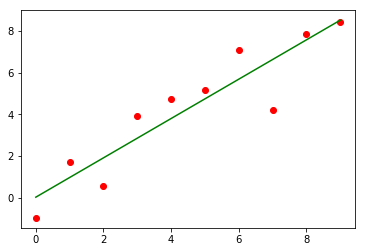

In [169]:
plt.plot(df['x'], df['y'], 'ro')
plt.plot(df['x'], df['y"'], 'g-')

In [170]:
# RMSE
from sklearn.metrics import mean_squared_error
print('MSE:', mean_squared_error(df['y'], df['y"']))
print('RMSE:', np.sqrt(mean_squared_error(df['y'], df['y"'])))

MSE: 1.3426598912815935
RMSE: 1.1587320187522192


<hr>

### Linear Regression: split data, namun hanya 2 data pertama sbg training

In [171]:
# fit model hanya dari 2 data pertama
model.fit(df[['x']].iloc[:2], df['y'].iloc[:2])
df['y"2'] = model.predict(df[['x']])
df

,x,y,"y""","y""2"
0,0,-0.968547,0.026238,-0.968547
1,1,1.706791,0.969559,1.706791
2,2,0.585305,1.912881,4.382129
3,3,3.931035,2.856203,7.057468
4,4,4.718419,3.799525,9.732806
5,5,5.166696,4.742846,12.408144
6,6,7.080921,5.686168,15.083482
7,7,4.197313,6.629490,17.758820
8,8,7.862285,7.572812,20.434158
9,9,8.431637,8.516133,23.109496


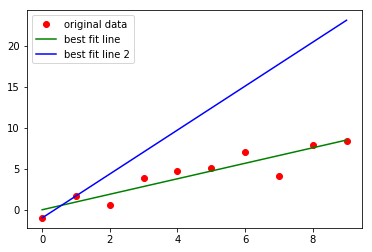

In [172]:
plt.plot(df['x'], df['y'], 'ro')
plt.plot(df['x'], df['y"'], 'g-')
plt.plot(df['x'], df['y"2'], 'b-')
plt.legend(['original data', 'best fit line', 'best fit line 2'])

<hr>

### Ridge Regression

L2 regularization: menambahkan ralat/penalty MSE = MSE $\displaystyle + \lambda \times m^2$

Di Sklearn, kekuatan nilai penalty dilambangkan dengan alpha $\displaystyle \alpha$

Jika nilai penalty = 0, maka hasil akan sama dengan __Linear Regression__ biasa

In [173]:
from sklearn.linear_model import Ridge

In [176]:
# modelR = Ridge(alpha=0) # alpha=0 == linear regression biasa, alpha default = 1
modelR = Ridge(alpha=0.8)
modelR.fit(df[['x']].iloc[:2], df['y'].iloc[:2])
df['y"Ridge'] = modelR.predict(df[['x']])
df

,x,y,"y""","y""2","y""Ridge"
0,0,-0.968547,0.026238,-0.968547,-0.145366
1,1,1.706791,0.969559,1.706791,0.883610
2,2,0.585305,1.912881,4.382129,1.912587
3,3,3.931035,2.856203,7.057468,2.941563
4,4,4.718419,3.799525,9.732806,3.970539
5,5,5.166696,4.742846,12.408144,4.999515
6,6,7.080921,5.686168,15.083482,6.028491
7,7,4.197313,6.629490,17.758820,7.057468
8,8,7.862285,7.572812,20.434158,8.086444
9,9,8.431637,8.516133,23.109496,9.115420


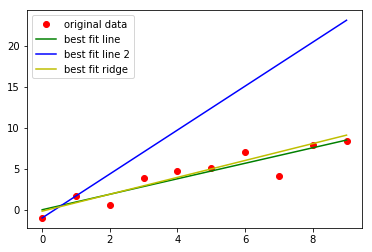

In [177]:
plt.plot(df['x'], df['y'], 'ro')
plt.plot(df['x'], df['y"'], 'g-')
plt.plot(df['x'], df['y"2'], 'b-')
plt.plot(df['x'], df['y"Ridge'], 'y-')
plt.legend(['original data', 'best fit line', 'best fit line 2', 'best fit ridge'])

<hr>

### Lasso Regression

L1 regularization: menambahkan ralat/penalty MSE = MSE $\displaystyle + \lambda \times |m|$

Di Sklearn, kekuatan nilai penalty dilambangkan dengan alpha $\displaystyle \alpha$

Jika nilai penalty = 0, maka hasil akan sama dengan __Linear Regression__ biasa

In [198]:
from sklearn.linear_model import Lasso

modelL = Lasso(alpha=0.4)
modelL.fit(df[['x']].iloc[:2], df['y'].iloc[:2])
df['y"Lasso'] = modelL.predict(df[['x']])
df

,x,y,"y""","y""2","y""Ridge","y""Lasso"
0,0,-0.968547,0.026238,-0.968547,-0.145366,-0.168547
1,1,1.706791,0.969559,1.706791,0.883610,0.906791
2,2,0.585305,1.912881,4.382129,1.912587,1.982129
3,3,3.931035,2.856203,7.057468,2.941563,3.057468
4,4,4.718419,3.799525,9.732806,3.970539,4.132806
5,5,5.166696,4.742846,12.408144,4.999515,5.208144
6,6,7.080921,5.686168,15.083482,6.028491,6.283482
7,7,4.197313,6.629490,17.758820,7.057468,7.358820
8,8,7.862285,7.572812,20.434158,8.086444,8.434158
9,9,8.431637,8.516133,23.109496,9.115420,9.509496


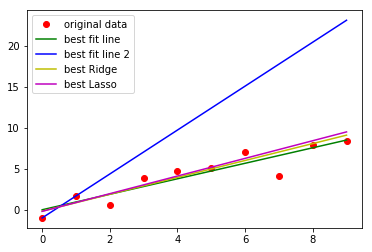

In [199]:
plt.plot(df['x'], df['y'], 'ro')
plt.plot(df['x'], df['y"'], 'g-')
plt.plot(df['x'], df['y"2'], 'b-')
plt.plot(df['x'], df['y"Ridge'], 'y-')
plt.plot(df['x'], df['y"Lasso'], 'm-')
plt.legend(['original data', 'best fit line', 'best fit line 2', 'best Ridge', 'best Lasso'])

<hr>

### Elastic-Net Regression

L1+L2 regularization: menambahkan ralat/penalty MSE = MSE $\displaystyle + \lambda_{ridge} \times m^2 + \lambda_{lasso} \times |m|$

Di Sklearn, kekuatan nilai penalty dilambangkan dengan alpha $\displaystyle \alpha$

Jika nilai penalty = 0, maka hasil akan sama dengan __Linear Regression__ biasa

In [201]:
from sklearn.linear_model import ElasticNet

modelE = ElasticNet(alpha=0.4)
modelE.fit(df[['x']].iloc[:2], df['y'].iloc[:2])
df['y"Elastic'] = modelE.predict(df[['x']])
df

,x,y,"y""","y""2","y""Ridge","y""Lasso","y""Elastic"
0,0,-0.968547,0.026238,-0.968547,-0.145366,-0.168547,-0.151805
1,1,1.706791,0.969559,1.706791,0.883610,0.906791,0.890050
2,2,0.585305,1.912881,4.382129,1.912587,1.982129,1.931904
3,3,3.931035,2.856203,7.057468,2.941563,3.057468,2.973759
4,4,4.718419,3.799525,9.732806,3.970539,4.132806,4.015613
5,5,5.166696,4.742846,12.408144,4.999515,5.208144,5.057468
6,6,7.080921,5.686168,15.083482,6.028491,6.283482,6.099322
7,7,4.197313,6.629490,17.758820,7.057468,7.358820,7.141177
8,8,7.862285,7.572812,20.434158,8.086444,8.434158,8.183031
9,9,8.431637,8.516133,23.109496,9.115420,9.509496,9.224886


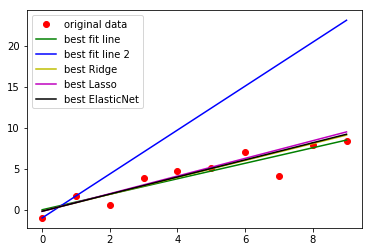

In [203]:
plt.plot(df['x'], df['y'], 'ro')
plt.plot(df['x'], df['y"'], 'g-')
plt.plot(df['x'], df['y"2'], 'b-')
plt.plot(df['x'], df['y"Ridge'], 'y-')
plt.plot(df['x'], df['y"Lasso'], 'm-')
plt.plot(df['x'], df['y"Elastic'], 'k-')
plt.legend(['original data', 'best fit line', 'best fit line 2', 'best Ridge', 'best Lasso', 'best ElasticNet'])